<a href="https://colab.research.google.com/github/diegoabordav-1223/Sistema-avanzados-de-9-semestre./blob/main/Borda_Diego_Rodriguez_Santiago_Martinez_Daniel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Clase 1 (2h): Introducción a Jupyter/Colab y al entorno de análisis de datos en Python

**Objetivos de la sesión**
- Configurar y usar Google Colab como entorno de trabajo.
- Comprender la estructura de un notebook (celdas de código y Markdown) y buenas prácticas.
- Importar y verificar librerías clave para análisis de datos: `numpy`, `pandas`, `matplotlib`, `seaborn`, `statsmodels`.
- Cargar un `.csv` y realizar una exploración inicial.
- Practicar *slicing* (filas/columnas) y conteo de valores faltantes.



## Flujo de trabajo recomendado (Colab ⇄ GitHub)
1. Abre este notebook en **Google Colab**.
2. Guarda una copia en tu repositorio: `Archivo → Guardar una copia en GitHub`.
3. Versiona tu trabajo repitiendo el guardado al final de la clase.



## Notebooks: estructura y ejecución
- Celdas **Código** y **Markdown**.
- Ejecuta con `Shift + Enter`.
- Modos: **Editar** (borde verde) y **Comando** (borde azul).  
  Atajos: `A` (arriba), `B` (abajo), `M` (Markdown), `Y` (Código), `D D` (borrar).


In [ ]:
# Comentario
print('Hola, Notebook 👋')
1 + 2

Hola, Notebook 👋


3

In [ ]:
print(1 + 2)
1 + 3

3


4

In [ ]:
1 + 2
1 + 3;  # suprime la última salida


## Buenas prácticas
- Indentación 4 espacios · Comentarios que expliquen el “por qué” · Longitud ≤ 100 · Bloques lógicos.


In [ ]:
#Los for son cosas repetitivas y el if es una condicional
resultado = []
for x in range(10):
    for y in range(5):
        if x * y >= 10:
            resultado.append((x, y))
print(resultado)


[(3, 4), (4, 3), (4, 4), (5, 2), (5, 3), (5, 4), (6, 2), (6, 3), (6, 4), (7, 2), (7, 3), (7, 4), (8, 2), (8, 3), (8, 4), (9, 2), (9, 3), (9, 4)]



## Librerías clave
`numpy`, `pandas`, `matplotlib`, `seaborn`, `statsmodels`


In [ ]:

# !pip install numpy pandas matplotlib seaborn statsmodels --quiet  # Descomenta si hace falta
import sys, platform
import numpy as np, pandas as pd # siempre colocar import para importar el tipo de libreria, luego se agrega el as y la libreria escogida. pandas sirve para cargar datos
import matplotlib.pyplot as plt # cuando termina en plt es por que se va generar una gráfica
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
print("Python:", sys.version.split()[0], "|", platform.platform())
print("NumPy:", np.__version__, "| pandas:", pd.__version__, "| matplotlib:", plt.matplotlib.__version__)
print("seaborn:", sns.__version__, "| statsmodels:", sm.__version__)


Python: 3.12.11 | Linux-6.1.123+-x86_64-with-glibc2.35
NumPy: 2.0.2 | pandas: 2.2.2 | matplotlib: 3.10.0
seaborn: 0.13.2 | statsmodels: 0.14.5


## Cargar datos (elige una opción)

In [ ]:
# https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv
# Opción A) Subir CSV desde tu equipo
from io import BytesIO
import pandas as pd
try:
    from google.colab import files
    uploaded = files.upload()
    if len(uploaded):
        fname, fbytes = next(iter(uploaded.items()))
        da = pd.read_csv(BytesIO(fbytes))
        print("Archivo cargado:", fname, "| shape:", da.shape)
        display(da.head())
except Exception as e:
    print("Si no estás en Colab o prefieres otra opción, usa la Opción B/C/D. Detalle:", e)


In [ ]:


# URL directa al archivo .csv de calidad de vino tinto
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"

# Leer el archivo CSV especificando el separador de punto y coma
df = pd.read_csv(url, sep=';')

# Mostrar las primeras 5 filas para verificar que se cargó correctamente
print("Datos cargados exitosamente:")
df.head()


Datos cargados exitosamente:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:

# Opción C) Leer desde Google Drive
# from google.colab import drive
# drive.mount('/content/drive')
# da = pd.read_csv('/content/drive/MiCarpeta/datos.csv')
# da.head()


### Opción D) Dataset de ejemplo

In [ ]:

import numpy as np, pandas as pd
np.random.seed(42)
n = 250
da = pd.DataFrame({
    "SEQN": np.arange(1, n+1),
    "RIAGENDR": np.random.choice([1, 2], size=n),
    "RIDAGEYR": np.random.randint(18, 80, size=n),
    "BMXWT": np.round(np.random.normal(70, 12, size=n), 1),
    "BMXHT": np.round(np.random.normal(168, 10, size=n), 1),
})
da["BMXBMI"] = np.round(da["BMXWT"] / (da["BMXHT"]/100)**2, 1)
da.loc[np.random.choice(da.index, size=10, replace=False), "BMXWT"] = np.nan
da.head()


,SEQN,RIAGENDR,RIDAGEYR,BMXWT,BMXHT,BMXBMI
0,1,1,79,56.2,150.4,24.8
1,2,2,74,86.7,183.0,25.9
2,3,1,69,59.7,158.9,23.6
3,4,1,30,57.7,173.6,19.1
4,5,1,58,80.6,160.5,31.3


## Exploración inicial

In [ ]:

print("shape:", da.shape) # hace referencia a la forma, el la forma de conocer el tamaño de la base
print("columnas:", list(da.columns)) # genera una lista con en número de columnas que hay
display(da.dtypes) # son los tipos de variable, enteros y decimales
display(da.head()) # Mu
display(da.describe(include='all')) # muestra el promedio, la desv. estan


shape: (250, 6)
columnas: ['SEQN', 'RIAGENDR', 'RIDAGEYR', 'BMXWT', 'BMXHT', 'BMXBMI']


,0
SEQN,int64
RIAGENDR,int64
RIDAGEYR,int64
BMXWT,float64
BMXHT,float64
BMXBMI,float64


,SEQN,RIAGENDR,RIDAGEYR,BMXWT,BMXHT,BMXBMI
0,1,1,79,56.2,150.4,24.8
1,2,2,74,86.7,183.0,25.9
2,3,1,69,59.7,158.9,23.6
3,4,1,30,57.7,173.6,19.1
4,5,1,58,80.6,160.5,31.3


,SEQN,RIAGENDR,RIDAGEYR,BMXWT,BMXHT,BMXBMI
count,250.000000,250.000000,250.000000,240.000000,250.000000,250.000000
mean,125.500000,1.496000,50.088000,69.407083,168.411600,24.830400
std,72.312977,0.500987,18.063038,13.028989,10.664936,5.719827
min,1.000000,1.000000,18.000000,29.600000,140.200000,10.200000
25%,63.250000,1.000000,36.000000,60.775000,160.800000,21.100000
50%,125.500000,1.000000,50.000000,69.100000,168.700000,24.200000
75%,187.750000,2.000000,66.000000,79.550000,175.100000,28.175000
max,250.000000,2.000000,79.000000,108.200000,197.800000,49.500000


## *Slicing* (filas y columnas)

In [ ]:

w = da["RIDAGEYR"]; x = da.loc[:, "RIDAGEYR"]; y = da.RIDAGEYR
z = da.iloc[:, da.columns.get_loc("RIDAGEYR")]
print("Max RIDAGEYR (cuatro formas):", w.max(), x.max(), y.max(), z.max())
fila4 = da.iloc[3, :]; fila4


Max RIDAGEYR (cuatro formas): 79 79 79 79


,3
SEQN,4.0
RIAGENDR,1.0
RIDAGEYR,30.0
BMXWT,57.7
BMXHT,173.6
BMXBMI,19.1


## Faltantes

In [ ]:

faltantes_bmxwt = pd.isnull(da["BMXWT"]).sum()
no_faltantes_bmxwt = pd.notnull(da["BMXWT"]).sum()
print("BMXWT → faltantes:", faltantes_bmxwt, "| no faltantes:", no_faltantes_bmxwt)


BMXWT → faltantes: 10 | no faltantes: 240


## Visualización rápida

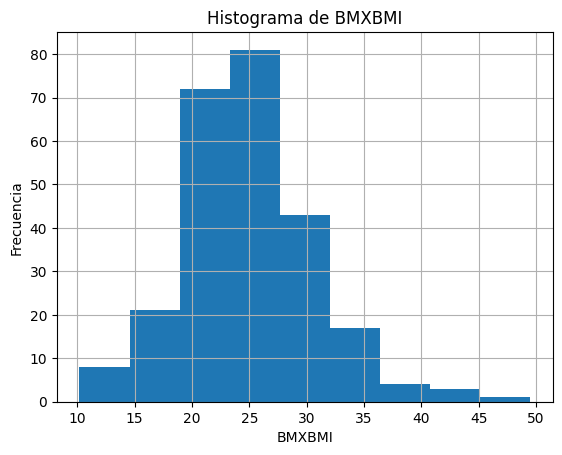

In [ ]:

col = "BMXBMI" if "BMXBMI" in da.columns else da.select_dtypes(include='number').columns[0]
plt.figure(); da[col].hist(bins=9)
plt.title(f"Histograma de {col}"); plt.xlabel(col); plt.ylabel("Frecuencia"); plt.show()



## Ejercicios (para tu Collab)
1) Reporta `shape`, `columns`, `dtypes`, `head`, `describe`.  
2) Dos variables numéricas: media, mediana, desviación estándar y cuantiles (25%, 50%, 75%).  
3) Tabla de frecuencias para una variable categórica.  
4) Columnas con valores faltantes y conteo por variable.  
5) (Opcional) Nueva columna derivada y su distribución.



### Respuestas del estudiante (Markdown)
<div class="response-box">
Escribe aquí tu análisis y conclusiones para los puntos 1–5.
</div>


In [ ]:
# Usar la base de datos https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv
# Respuestas del estudiante (Código)
# TODO: Añade aquí tu código para los ejercicios de la Clase 1
# hacer para la base de datos DF

In [ ]:
print("shape:", df.shape)

shape: (1599, 12)


In [ ]:
import random
decimal_number = random.uniform(1.0, 100.0)
print(decimal_number)

10.381263411193197


In [ ]:

print("shape:", df.shape) # hace referencia a la forma, el la forma de conocer el tamaño de la base
print("columnas:", list(df.columns)) # genera una lista con en número de columnas que hay
display(df.dtypes) # son los tipos de variable, enteros y decimales
display(df.head()) # Mu
display(df.describe(include='all')) # muestra el promedio, la desv. estan

shape: (1599, 12)
columnas: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


,0
fixed acidity,float64
volatile acidity,float64
citric acid,float64
residual sugar,float64
chlorides,float64
free sulfur dioxide,float64
total sulfur dioxide,float64
density,float64
pH,float64
sulphates,float64


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


**Preguntas**
1) Crear cuenta en GitHub: Regístrate en https://github.com con tu correo institucional. Elige un nombre de usuario profesional y verifica tu correo.

2) Crear repositorio en GitHub: Crea un repositorio público (activa Add a README file). Copia y guarda el enlace del repositorio. Describe los pasos realizados.

3) Subir un notebook desde Colab a GitHub: Explica y realiza el proceso de Archivo → Guardar una copia en GitHub (autorización, selección de repo, mensaje de commit).

4) Actualizar un notebook ya guardado en GitHub: ¿Cómo guardar cambios sobre el mismo archivo en lugar de crear uno nuevo? Explica el flujo con un mensaje de commit adecuado.

5) TPU vs GPU en Google Colab: ¿Qué diferencia hay y cuándo se recomienda usar cada una?

6) Usando la base dw (wine): reporta shape, columns, dtypes, .head() y .describe().

7) En dw: selecciona dos variables numéricas y calcula para cada una: media, mediana, desviación estándar y cuantiles (25%, 50%, 75%).

8) Tabla de frecuencias: muestra cómo construir una tabla de frecuencias para una variable categórica en Pandas (value_counts()) y cómo convertirla en DataFrame.

9) Valores faltantes en dw: identifica las columnas con valores faltantes y muestra el conteo por columna

10) Subconjunto y estadísticas: en dw, toma las columnas "free sulfur dioxide" y "density", crea un nuevo DataFrame con ellas y reporta sus estadísticas descriptivas.

SOLUCIÓN TALLER 1
Respuestas (agrega tus celdas debajo de cada pregunta) Importante: No borres ni edites las celdas de enunciado. Añade tus respuestas debajo de cada pregunta, para ello copia cada pregunta y responde si requieres texto agrega +Texto, si requieres código, agrega más código.

Integrante 1: Diego Alejandro Borda Vanegas

Enlace Github 1: https://github.com/diegoabordav-1223/Sistema-avanzados-de-9-semestre./blob/main/Borda_Diego_Rodriguez_Santiago_Martinez_Daniel.ipynb


Integrante 2: Daniel Felipe Martinez Guerrero

Enlace Github 2:https://github.com/danielfmartinezg-cmd/Sistemas-avanzados-de-9-semestres/blob/main/Borda_Diego_Rodriguez_Santiago_Martinez_Daniel.ipynb

Integrante 3: David Santiago Rodriguez Leiva

Enlace Github 3:https://github.com/davidsrodriguezl-cloud/Sistema-avanzados-de-NOVENO-semestre/blob/main/Borda_Diego_Rodriguez_Santiago_Martinez_Daniel.ipynb


SOLUCIÓN CUESTIONARIO:

Respuestas de preguntas 1,2,3 y 4 y son los siguiente enlaces :

https://github.com/danielfmartinezg-cmd/Sistemas-avanzados-de-9-semestres/blob/main/Borda_Diego_Rodriguez_Santiago_Martinez_Daniel.ipynb

https://github.com/davidsrodriguezl-cloud/Sistema-avanzados-de-NOVENO-semestre/blob/main/Borda_Diego_Rodriguez_Santiago_Martinez_Daniel.ipynb

 https://github.com/diegoabordav-1223/Sistema-avanzados-de-9-semestre./blob/main/Borda_Diego_Rodriguez_Santiago_Martinez_Daniel.ipynb

PREGUNTA 5:

GPU( Unidad de procesamiento grafico)
Diseñada originalmente para graficos y videojuegos pero muy eficiente en calculos paralelos de matrices.

Se usa principalmente para entrenamiento y prediccion de redes neuronales profundas (deep learning) sobre todo cuando se trabaja con imagenes , vision por computadora, procesamiento de videos o modelos que manejan grandes cantidades de datos en paralelo.

TPU (Tensor Processsing Unit)

Es un chip especializado creado por Google especificamente para acelerar operaciones y tensores y redes neuronales.

Se recomienda cuando se entregan modelos grandes de aprendizaje profundo en TensorFlow.




Pregunta 6:

A continuación se desrrollan las tablas correspondientes, que dan respuesta a las preguntas 6,7 y 8

In [ ]:
print("shape:", df.shape) # hace referencia a la forma, el la forma de conocer el tamaño de la base
print("columnas:", list(df.columns)) # genera una lista con en número de columnas que hay
display(df.dtypes) # son los tipos de variable, enteros y decimales
display(df.head()) # Mu
display(df.describe(include='all')) # muestra el promedio, la desv. estan

shape: (1599, 12)
columnas: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


,0
fixed acidity,float64
volatile acidity,float64
citric acid,float64
residual sugar,float64
chlorides,float64
free sulfur dioxide,float64
total sulfur dioxide,float64
density,float64
pH,float64
sulphates,float64


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Solucion a la pregunta 9

In [ ]:
import pandas as pd

faltantes_sulphates = pd.isnull(df["sulphates"]).sum()
no_faltantes_sulphates = pd.notnull(df["sulphates"]).sum()
print("sulphates → faltantes:", faltantes_sulphates, "| no faltantes:", no_faltantes_sulphates)

sulphates → faltantes: 0 | no faltantes: 1599


Solucion a la pregunta 10


In [ ]:
#crear el subconjunto con las columnas free sulfur dioxide y density
subset=df[['free sulfur dioxide','density']]
subset.describe()


,free sulfur dioxide,density
count,1599.000000,1599.000000
mean,15.874922,0.996747
std,10.460157,0.001887
min,1.000000,0.990070
25%,7.000000,0.995600
50%,14.000000,0.996750
75%,21.000000,0.997835
max,72.000000,1.003690


from matplotlib import pyplot as plt
_df_0['free sulfur dioxide'].plot(kind='hist', bins=20, title='free sulfur dioxide')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['density'].plot(kind='hist', bins=20, title='density')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='free sulfur dioxide', y='density', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['free sulfur dioxide'].plot(kind='line', figsize=(8, 4), title='free sulfur dioxide')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_4['density'].plot(kind='line', figsize=(8, 4), title='density')
plt.gca().spines[['top', 'right']].set_visible(False)

para free sulfur dioxide , el promedio es 15.87 con valores entre 1 y 72

para density, el promedio es 0.9967 con valores entre 0.9900 y 1.0037

no se presentan valores faltantes en ninguna de las dos columnas